In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/biank/Downloads/abalone.data", index_col = None, header = None)

In [4]:
data.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [7]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

<AxesSubplot:xlabel='8', ylabel='count'>

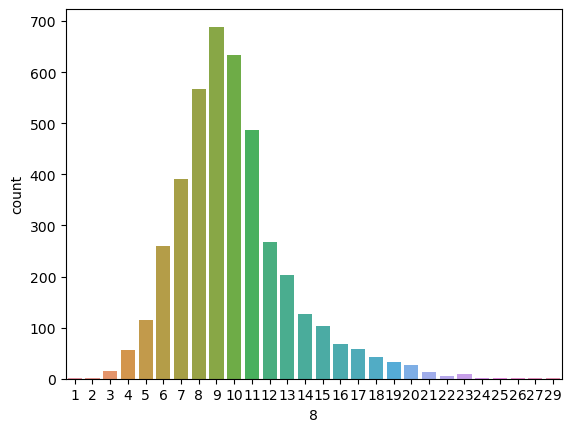

In [8]:
sns.countplot(data = data, x=data[8])

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [10]:
data

,0,1,2,3,4,5,6,7,8
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [11]:
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
X

array([[   2,   66,   56, ...,  715,  417,  199],
       [   2,   45,   36, ...,  285,  178,   94],
       [   0,   81,   67, ...,  962,  480,  280],
       ...,
       [   2,   95,   78, ..., 1727,  994,  571],
       [   0,  100,   80, ..., 1610, 1005,  518],
       [   2,  117,   94, ..., 2348, 1461,  732]], dtype=int64)

In [13]:
y

array([263, 113, 374, ..., 550, 530, 813], dtype=int64)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (7,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               800       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,411
Trainable params: 7,411
Non-trainable params: 0
_________________________________________________________________


In [20]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 328.5926 - mse: 328.5926 - val_loss: 407.5742 - val_mse: 407.5742
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 101.8497 - mse: 101.8497 - val_loss: 20.3971 - val_mse: 20.3971
Epoch 3/100
105/105 [==============================] - 0s 4ms/step - loss: 55.1664 - mse: 55.1664 - val_loss: 7.9199 - val_mse: 7.9199
Epoch 4/100
105/105 [==============================] - 0s 4ms/step - loss: 36.6257 - mse: 36.6257 - val_loss: 61.1747 - val_mse: 61.1747
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 23.0364 - mse: 23.0364 - val_loss: 0.3287 - val_mse: 0.3287
Epoch 6/100
105/105 [==============================] - 0s 4ms/step - loss: 11.9413 - mse: 11.9413 - val_loss: 23.1591 - val_mse: 23.1591
Epoch 7/100
105/105 [==============================] - 0s 4ms/step - loss: 4.0889 - mse: 4.0889 - val_loss: 11.4309 - val_mse: 11.4309
Epoch 8/100
105/105 [====================

In [16]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019


[0.0018958891741931438, 0.0018958891741931438]

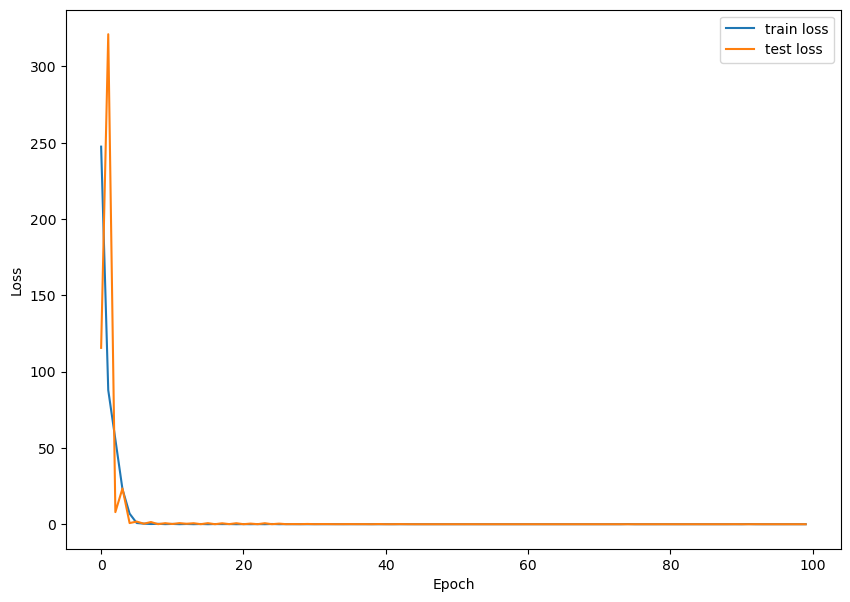

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

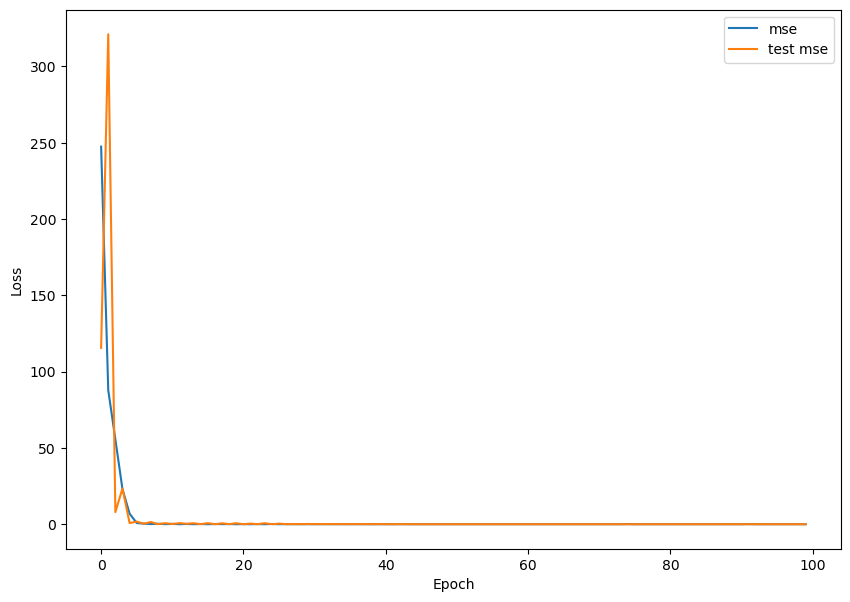

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()